<a href="https://colab.research.google.com/github/MahmoudEl-sherbiny/DEPI/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [576]:
print("ee")

ee


# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Split the data into train and test sets (80%-20%).
7. Fit a Simple Linear Regression model.
8. Print learned coefficient and intercept.

9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


### Generate  & perpare Data

In [577]:
X = np.linspace(1, 100, num=100, dtype=int).reshape(-1, 1) # Feature 2D
y_noisy = (2 * X + 3).astype(float) + np.random.randn(*X.shape) * 5

### Make Test Split for Data

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2 , random_state=42)


In [579]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [580]:
w1 = round(model.coef_[0][0], 3)
b  = round(model.intercept_[0], 3)
print(f"Model Coefficient 'w1': {w1}, Model Intercept 'b': {b}")

Model Coefficient 'w1': 2.001, Model Intercept 'b': 3.173


In [581]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)


data_set = {
    "Traing Set": (y_train, y_predict_train),
    "Testing Set": (y_test, y_predict_test)
}

for name, (y_actual, y_predict) in data_set.items():
  mse = mean_squared_error(y_actual, y_predict)
  mae = mean_absolute_error(y_actual, y_predict)
  r2 = r2_score(y_actual, y_predict)
  print(f"{name} Evaluation:")
  print(f"   Mean Square Error = {mse:.3f}")
  print(f"   Mean Absolute Error = {mae:.3f}")
  print(f"   R2 Score = {r2*100:.1f}%")
  print("")


Traing Set Evaluation:
   Mean Square Error = 18.163
   Mean Absolute Error = 3.519
   R2 Score = 99.5%

Testing Set Evaluation:
   Mean Square Error = 34.373
   Mean Absolute Error = 4.789
   R2 Score = 98.9%



In [582]:
new_valueTest = np.array([[85]])
# in correct model 2*85 + 3 = 173
model.predict(new_valueTest)

array([[173.28187237]])

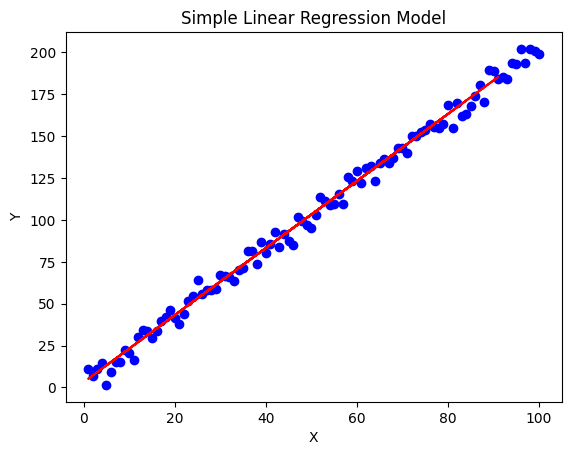

In [583]:
plt.scatter(X, y_noisy, color="blue", label="Original Data")
plt.plot(X_test, y_predict_test, color="red", label="Regression Line")
# plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression Model")
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [584]:
np.random.seed(42)
x1 = np.random.randint(1, 101, size=(100, 1))
x2 = np.random.randint(1,101, size=(100, 1))
X = np.concatenate((x1, x2), axis=1) # features              100 , 1
y_noise = (2*x1 + 5*x2 + 10).astype(float) + np.random.randn(*x1.shape) * 15

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.2, random_state=42)


In [586]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
w1 = round(model2.coef_[0][0], 3)
w2 = round(model2.coef_[0][1], 3)
b  = round(model2.intercept_[0], 3)
print(f"Model Cofficients : W1= {w1}  W2= {w2}, Intercept = {b}")

Model Cofficients : W1= 2.069  W2= 4.931, Intercept = 10.571


In [587]:
print(f"2*X1    + 5*X2    + 10")
print(f"{w1}*X1 + {w2}X2 + {b}")

2*X1    + 5*X2    + 10
2.069*X1 + 4.931X2 + 10.571


In [588]:
new_features = np.array([[10,10]])
model2.predict(new_features)


array([[80.57259677]])

In [589]:
# Evaluation for train
y_predict_train = model2.predict(X_train)
y_predict_test = model2.predict(X_test)

dataset = {
      "Training Set": (y_train, y_predict_train),
      "Testing Set": (y_test, y_predict_test)
}

for name ,(y_actual, y_perdict) in dataset.items():
  mse = mean_squared_error(y_actual, y_perdict)
  mae = mean_absolute_error(y_actual, y_perdict)
  r2 = r2_score(y_actual, y_perdict)
  print(f"{name} Evaluation:")
  print(f"   Mean Square Error = {mse:.3f}")
  print(f"   Mean Absolute Error = {mae:.3f}")
  print(f"   R2 Score = {r2*100:.1f}%")
  print("#####################################")



Training Set Evaluation:
   Mean Square Error = 196.535
   Mean Absolute Error = 11.165
   R2 Score = 99.3%
#####################################
Testing Set Evaluation:
   Mean Square Error = 211.720
   Mean Absolute Error = 11.083
   R2 Score = 98.8%
#####################################


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [590]:
np.random.seed(10)
x = np.random.randint(1, 101, size=(100, 1))
# X = np.concatenate((x, x**2, x**3), axis=1)
y_noise = (5*x + 3*(x**2) + 20).astype(float) + np.random.randn(*x.shape) * 4000


In [591]:
poly = PolynomialFeatures(degree= 2)
X = poly.fit_transform(x)

In [592]:
X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.2, random_state=42)


In [593]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
w1 = round(model3.coef_[0][1], 3)
w2 = round(model3.coef_[0][2], 3)
b  = round(model3.intercept_[0], 3)
print(f"Model Cofficients : W1= {w1}  W2= {w2} , Intercept  b = {b}")
# True Values                    5         3                    20

Model Cofficients : W1= 5.196  W2= 3.263 , Intercept  b = -415.344


In [594]:
new_features =  np.array([[10]])
x_poly_new_feature = poly.transform(new_features)
model3.predict(x_poly_new_feature)

array([[-37.06877663]])

In [595]:
y_predict_train = model3.predict(X_train)
y_predict_test = model3.predict(X_test)

dataset ={
      "Training Set": (y_train, y_predict_train),
      "Testing Set": (y_test, y_predict_test)

}

for name, (y_actual, y_predict) in dataset.items():
  mse = mean_squared_error(y_actual, y_predict)
  mae = mean_absolute_error(y_actual, y_predict)
  r2  = r2_score(y_actual, y_predict)
  print(f"{name} Evaluation:")
  print(f"   Mean Square Error = {mse:.3f}")
  print(f"   Mean Absolute Error = {mae:.3f}")
  print(f"   R2 Score = {r2*100:.2f}%")
  print("#####################################")


Training Set Evaluation:
   Mean Square Error = 18281087.443
   Mean Absolute Error = 3448.839
   R2 Score = 84.80%
#####################################
Testing Set Evaluation:
   Mean Square Error = 11984628.986
   Mean Absolute Error = 2681.585
   R2 Score = 91.48%
#####################################


In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


In [597]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


These are the main Features/Columns available in the dataset :

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [598]:
os.listdir(path)

['airlines_flights_data.csv']

In [599]:
full_path = os.path.join(path,os.listdir(path)[0])

In [600]:
df = pd.read_csv(full_path, index_col=0)
df.reset_index(drop=True, inplace=True)
# We make the first column is index becuase it's already have index value then we drop it to reset_index to default

In [601]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


1. we have 11 columns (8 object + 2 int64 + 1 float64)
2. We have 300153 vector row and in all columns there is no missing value

In [603]:
df.describe(include="all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


1. In Airline column we have 6 Unique values for different Companies and the highest frequency return to Vistara Company with (127859) appearance
2. In flight Column we have 1561 Unique Values for different flight code It is an identifier for a specific scheduled flight (airline + route + time).
and we have this information in another feature so we can drop this column
3. In Source City we have 6 Unique values for different cities  in India the most city appear is Delhi
4. In Departure Time We have 6 Unique Values and most appear value is Morning with 71146
5. In Stop column That show Is the flight stop or not and if stop how many times and the most frequecy return to one stop with 250863
6. In arrival time we have 6 Unique Values and most appear value is Night with 91531
7. In class we 2 unique value 1 for Economy and 1 for Business and most appear value is Economy with  206666 appearance
8. Duration a continuous feature that displays the overall amount of time it takes to travel between cities in hours with mean 12.221 and std 7.191 with min value  0.83 and Max value 49.830 Actually there is outliers in this column why because Q3 + 1.5 *IQR = 30.18 and any value greater than the 30.18 consider outlier
9. Day_left This is a derived characteristic that is calculated by subtracting the trip date by the booking date with mean 26.004 and std 13.561 and miniumn days left 1 and maximum 49
10. Price of ticket with mean of 20889.660 and std 22697.76 and min value 1105 and max value 123071 and you will find outlier because Q3 + 1.5 * IQR = 99128 and there is values higher than this value



In [604]:
df.drop(columns="flight", inplace=True)

In [605]:
# Check for duplicates
print(f"The Duplicated Rows =  {df.duplicated().sum()}")
print(f"The Null Values = {df.isna().sum().sum()}")

The Duplicated Rows =  2213
The Null Values = 0


In [606]:
# Drop Duplicated Rows
df.drop_duplicates(inplace=True)
print(f"The Duplicated Rows =  {df.duplicated().sum()}")


The Duplicated Rows =  0


In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


In [608]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [609]:
object_columns = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time','destination_city', 'class']
numeric_columns = ["duration", "days_left",	"price"]

In [610]:
correlation_matrix = df[numeric_columns].corr()
correlation_matrix


,duration,days_left,price
duration,1.000000,-0.039839,0.201035
days_left,-0.039839,1.000000,-0.092302
price,0.201035,-0.092302,1.000000


In [611]:
for col in object_columns:
  print(df[col].value_counts())
  print("###################################")


airline
Vistara      126962
Air_India     80882
Indigo        42470
GO_FIRST      22979
AirAsia       16011
SpiceJet       8636
Name: count, dtype: int64
###################################
source_city
Delhi        60510
Mumbai       60378
Bangalore    51588
Kolkata      46240
Hyderabad    40704
Chennai      38520
Name: count, dtype: int64
###################################
departure_time
Morning          70824
Early_Morning    66250
Evening          64428
Night            47651
Afternoon        47485
Late_Night        1302
Name: count, dtype: int64
###################################
stops
one            250314
zero            34341
two_or_more     13285
Name: count, dtype: int64
###################################
arrival_time
Night            90712
Evening          77960
Morning          62054
Afternoon        38030
Early_Morning    15333
Late_Night       13851
Name: count, dtype: int64
###################################
destination_city
Mumbai       58691
Delhi        56749
Banga

In [612]:
def plot_categorical_columns(data_frame, cols, plots_per_row=2):
    """
    Plots frequency countplots for any number of categorical columns dynamically.

    Parameters:
    - data_frame: pandas DataFrame
    - cols: list of column names (categorical features)
    - plots_per_row: number of plots per row (default = 2)
    """
    colors_plate = ["tomato", "gold", "lightgreen", "purple", "skyblue", "salmon"]

    # Calculate subplot grid size
    n_rows = math.ceil(len(cols) / plots_per_row)
    plt.figure(figsize=(6 * plots_per_row, 5 * n_rows))

    for i, col in enumerate(cols, start=1):
        plt.subplot(n_rows, plots_per_row, i)
        desc_order = data_frame[col].value_counts().index
        sns.countplot(data=data_frame, x=col, order=desc_order,
                      color=random.choice(colors_plate))
        plt.xticks(rotation=45)
        plt.title(f"Frequency of {col}")

    plt.tight_layout()
    plt.show()



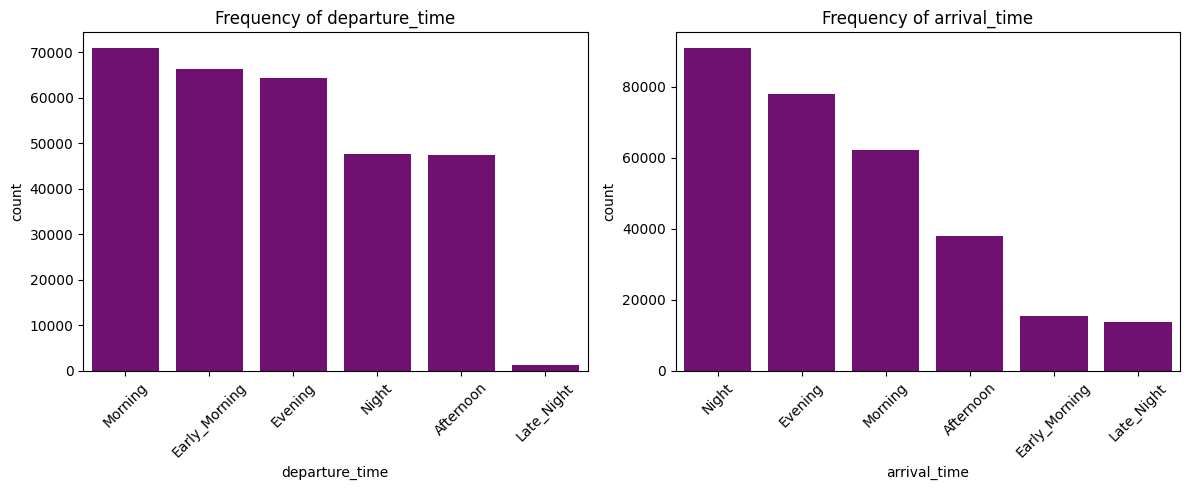

In [613]:
plot_categorical_columns(df, ["departure_time", "arrival_time"])
# Order of time (Early_Morning >> Morning >> Afternoon >> Evening >> Night >> Late_Night)

1. Most flights fly in the morning and Early_Morning
2. Most flights reach to destination at Night and Evening


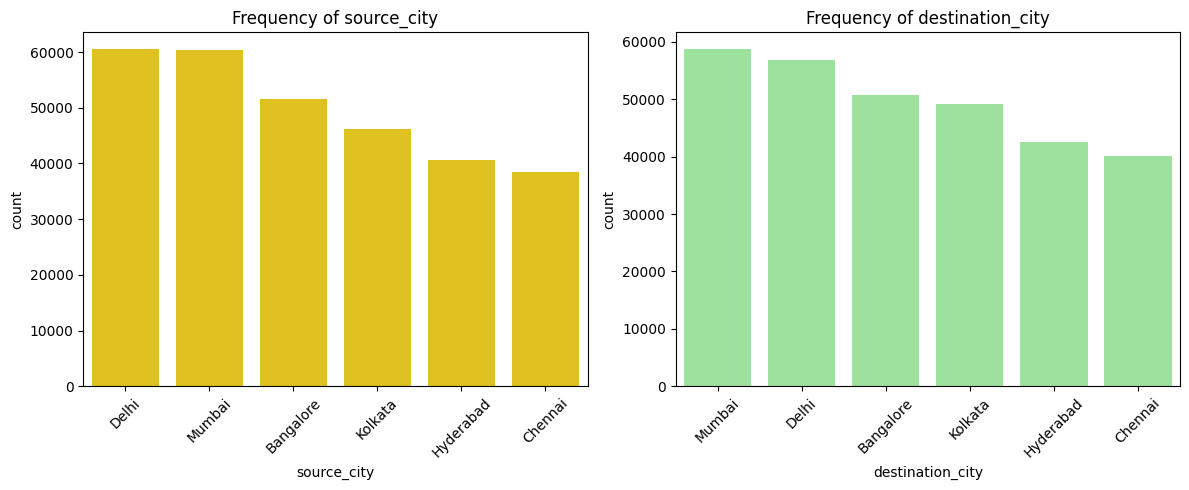

In [614]:
plot_categorical_columns(df,[ "source_city", "destination_city"])

1. Most Clients Leave or Go Delhi and Mumbia may be becasue   
  * Delhi – National Capital Territory of India.
  * Mumbai – Financial capital of India, state of Maharashtra.




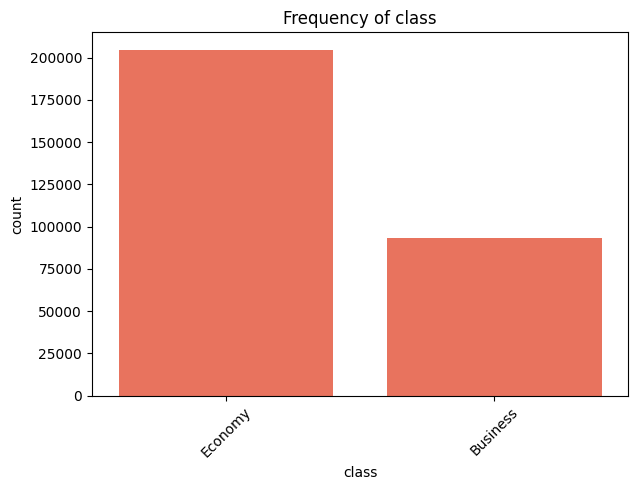

In [615]:
plot_categorical_columns(df, ["class"])

1. Most Client in Economy Class

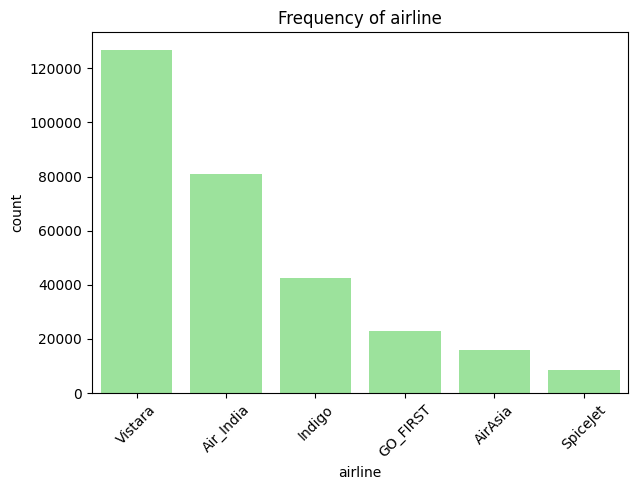

In [616]:
plot_categorical_columns(df, ["airline"])



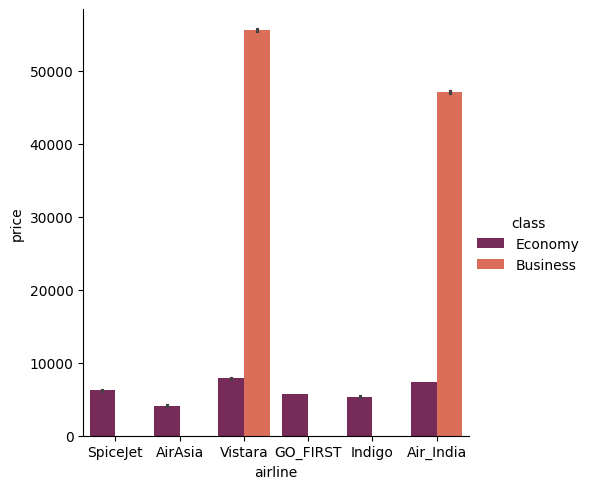

In [617]:
sns.catplot(data=df,kind="bar", x="airline", y="price", hue="class", palette="rocket")

1. Vistara and Air_India Only this 2 companyies have bussiness class


1. Most Clients Deal with Vistara Company and Air_India
2. Compaies lie Indigo, Go_FIRST , AirAsia , Spicejet can make offers or serves to improve the performance

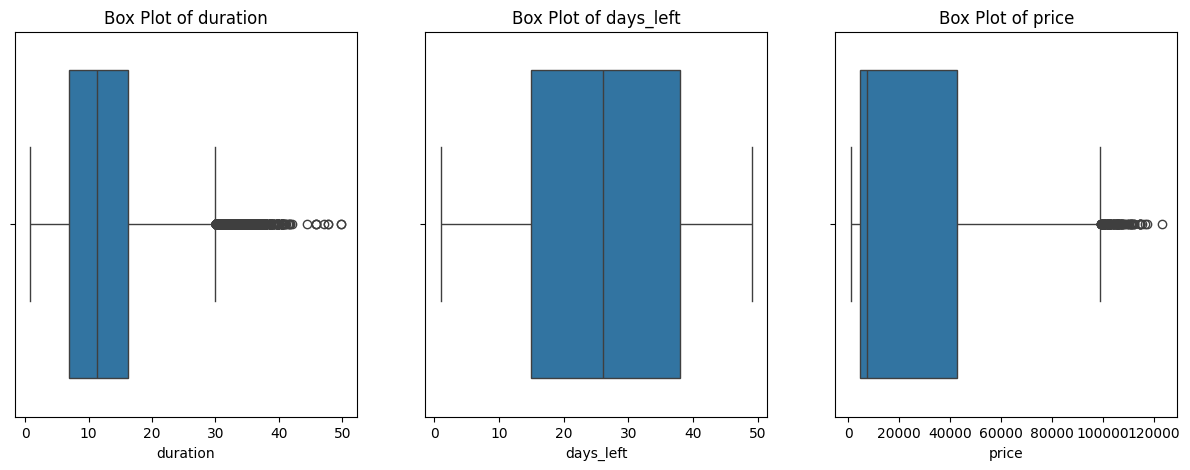

In [618]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns, start=1):
  plt.subplot(1,3,i)
  sns.boxplot(data=df, x=col)
  plt.title(f"Box Plot of {col}")

plt.show()

 1. The Oultiers inside the price column return to the bussiness class and day_left are so close so it's normal

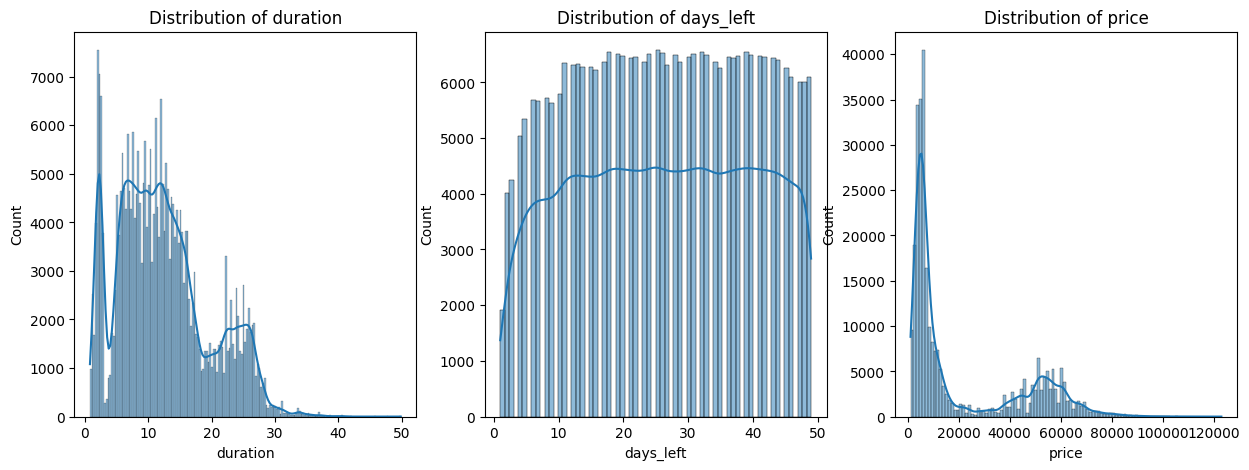

In [619]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns, start=1):
  plt.subplot(1,3,i)
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"Distribution of {col}")

plt.show()

1️⃣ Distribution of duration (Flight Duration in hours)

This airline dataset is dominated by short-haul domestic/regional flights.

The few extreme long durations might be  delayed connections, or data entry issues.

2️⃣ Distribution of days_left (Days Until Departure)

Insight:

Passengers book at all times, from last-minute to well in advance.

The dip close to departure could mean higher prices discourage last-minute purchases or limited seat availability.

.

3️⃣ Distribution of price (Ticket Price)

Insight:

Price distribution is heavily skewed → log transformation might help if used for modeling.

Could segment passengers into budget, mid-tier, and premium markets.

Outliers should be checked — they could be either rare real prices or data errors.

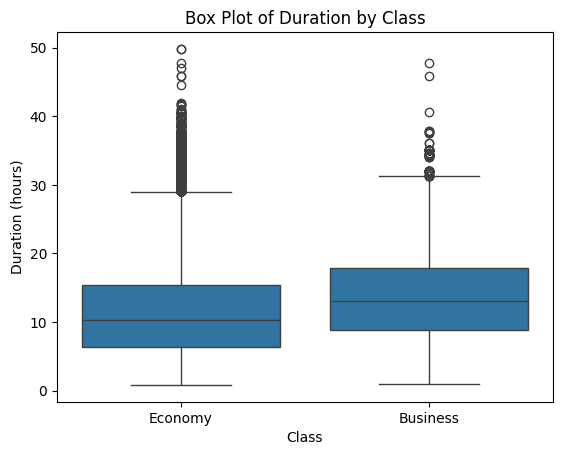

In [620]:
sns.boxplot(data=df, x='class', y='duration')
plt.title('Box Plot of Duration by Class')
plt.xlabel('Class')
plt.ylabel('Duration (hours)')
plt.show()

1. There is many of outliers in Economy Class

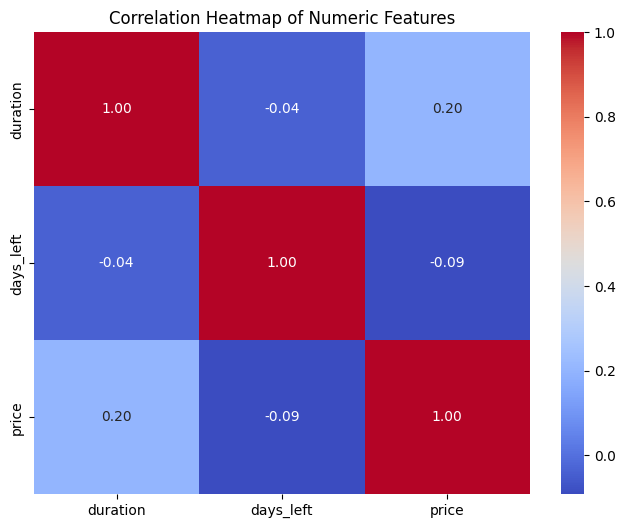

In [621]:

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

1. All Linear Correlation is weak so these feature have a little effect on target

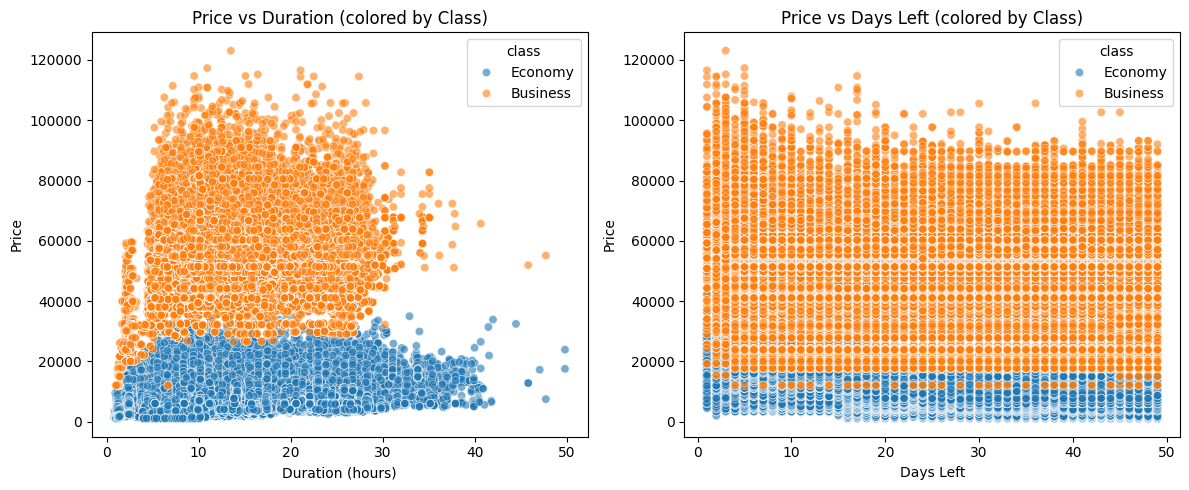

In [622]:
plt.figure(figsize=(12, 5))

# Scatter plot: price vs duration (color by class)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='duration', y='price', hue='class', alpha=0.6)
plt.title('Price vs Duration (colored by Class)')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')

# Scatter plot: price vs days_left (color by class)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='days_left', y='price', hue='class', alpha=0.6)
plt.title('Price vs Days Left (colored by Class)')
plt.xlabel('Days Left')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

1. The Class feature has big effect on price than the duration and Days left

In [623]:
# Remove outliers using IQR
Q1_duration = df['duration'].quantile(0.25)
Q3_duration = df['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
df = df[(df['duration'] >= Q1_duration - 1.5 * IQR_duration) & (df['duration'] <= Q3_duration + 1.5 * IQR_duration)]

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
df = df[(df['price'] >= Q1_price - 1.5 * IQR_price) & (df['price'] <= Q3_price + 1.5 * IQR_price)]

print(f"Shape of the dataframe after removing outliers: {df.shape}")

Shape of the dataframe after removing outliers: (295606, 10)


In [624]:
X = df.drop("price", axis=1)
y = df["price"]

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In [626]:
ordinal_columns = ["stops", "departure_time", "arrival_time", "class"]
nominal_columns = ["airline", "source_city", "destination_city"]
# duration	days_left	price

In [627]:
le = LabelEncoder()

for col in ordinal_columns:
  X_train[col + "_labelEncoding"] = le.fit_transform(X_train[col])
  X_test[col +"_labelEncoding"]  = le.transform(X_test[col])

X_train.drop(columns=ordinal_columns, inplace=True)
X_test.drop(columns=ordinal_columns, inplace=True)

In [628]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

X_train_encoded = ohe.fit_transform(X_train[nominal_columns]) # return numpy array
X_test_encoded = ohe.transform(X_test[nominal_columns]) # return numpy array

encoded_X_train_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(nominal_columns), index=X_train.index)
encoded_X_test_df  = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(nominal_columns), index=X_test.index)

X_train.drop(columns=nominal_columns, inplace=True)
X_test.drop(columns=nominal_columns, inplace=True)


In [629]:
X_train = pd.concat([X_train, encoded_X_train_df] ,axis=1)
X_test = pd.concat([X_test, encoded_X_test_df] ,axis=1)


In [630]:
X_train

,duration,days_left,stops_labelEncoding,departure_time_labelEncoding,arrival_time_labelEncoding,class_labelEncoding,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
240572,15.50,37,0,2,4,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
249264,11.75,9,0,4,5,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151549,22.42,38,0,4,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
197596,8.00,47,0,1,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243883,21.50,35,0,5,2,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122221,26.25,18,0,5,5,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
263538,2.33,42,2,5,5,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
134471,14.58,43,0,1,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149591,27.50,19,0,0,2,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [631]:
from sklearn.preprocessing import RobustScaler
# Identify the columns to scale (all columns in X_train and X_test after encoding)
features_to_scale = ["duration", "days_left"]

scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled = scaler.transform(X_test[features_to_scale])

# Convert the scaled numpy arrays back to pandas DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_to_scale, index=X_test.index)

In [632]:
X_train_scaled_df

,duration,days_left
240572,0.459459,0.478261
249264,0.054054,-0.739130
151549,1.207568,0.521739
197596,-0.351351,0.913043
243883,1.108108,0.391304
...,...,...
122221,1.621622,-0.347826
263538,-0.964324,0.695652
134471,0.360000,0.739130
149591,1.756757,-0.304348


In [633]:
X_train.drop(["duration", "days_left"], axis=1, inplace=True)
# X_train.isna().sum()

In [634]:
X_test.drop(["duration", "days_left"], axis=1, inplace=True)
X_test

,stops_labelEncoding,departure_time_labelEncoding,arrival_time_labelEncoding,class_labelEncoding,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
102733,0,4,5,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15687,2,5,3,1,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
193113,0,1,5,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
152111,0,0,2,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
110805,2,0,2,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87658,0,1,5,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
109768,0,2,2,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
142406,2,1,4,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
207177,0,2,4,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [635]:
X_train2 = pd.concat([X_train_scaled_df, X_train] ,axis=1)
X_train2

,duration,days_left,stops_labelEncoding,departure_time_labelEncoding,arrival_time_labelEncoding,class_labelEncoding,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
240572,0.459459,0.478261,0,2,4,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
249264,0.054054,-0.739130,0,4,5,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151549,1.207568,0.521739,0,4,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
197596,-0.351351,0.913043,0,1,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243883,1.108108,0.391304,0,5,2,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122221,1.621622,-0.347826,0,5,5,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
263538,-0.964324,0.695652,2,5,5,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
134471,0.360000,0.739130,0,1,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149591,1.756757,-0.304348,0,0,2,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [636]:
X_test2 = pd.concat([X_test_scaled_df, X_test], axis=1)
X_test2

,duration,days_left,stops_labelEncoding,departure_time_labelEncoding,arrival_time_labelEncoding,class_labelEncoding,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
102733,-0.045405,1.000000,0,4,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15687,-0.900541,0.130435,2,5,3,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
193113,0.197838,0.739130,0,1,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
152111,-0.684324,0.782609,0,0,2,1,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
110805,-1.035676,-0.608696,2,0,2,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87658,0.396757,-0.260870,0,1,5,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
109768,1.603243,-1.043478,0,2,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
142406,-0.954595,1.000000,2,1,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
207177,0.432432,-0.869565,0,2,4,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [637]:
X_test2.shape


(88682, 24)

In [638]:
model_tic = LinearRegression()
model_tic.fit(X_train2, y_train)

LinearRegression()

In [639]:
from logging import root
y_predict_train = model_tic.predict(X_train2)
y_predict_test = model_tic.predict(X_test2)

dataset ={
      "Training Set": (y_train, y_predict_train),
      "Testing Set": (y_test, y_predict_test)

}

for name, (y_actual, y_predict) in dataset.items():
  mse = mean_squared_error(y_actual, y_predict)
  mae = mean_absolute_error(y_actual, y_predict)
  r2  = r2_score(y_actual, y_predict)
  root_mse = root_mean_squared_error(y_actual, y_predict)
  print(f"{name} Evaluation:")
  print(f"   Mean Square Error = {mse:.3f}")
  print(f"   Root Mean Square Error = {root_mse:.3f}")
  print(f"   Mean Absolute Error = {mae:.3f}")
  print(f"   R2 Score = {r2*100:.2f}%")
  print("#####################################")

Training Set Evaluation:
   Mean Square Error = 46323004.089
   Root Mean Square Error = 6806.101
   Mean Absolute Error = 4592.855
   R2 Score = 91.00%
#####################################
Testing Set Evaluation:
   Mean Square Error = 46793505.030
   Root Mean Square Error = 6840.578
   Mean Absolute Error = 4609.885
   R2 Score = 90.99%
#####################################


In [642]:
import joblib
joblib.dump(model_tic, "ticket_price_model.joblib")


['ticket_price_model.joblib']